In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [52]:
housing_data = pd.read_csv('Housing.csv')

In [53]:
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [54]:
housing_data.shape

(545, 13)

In [55]:
housing_data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [56]:
correlation = housing_data.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_31996\1510805020.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = housing_data.corr()


<Axes: >

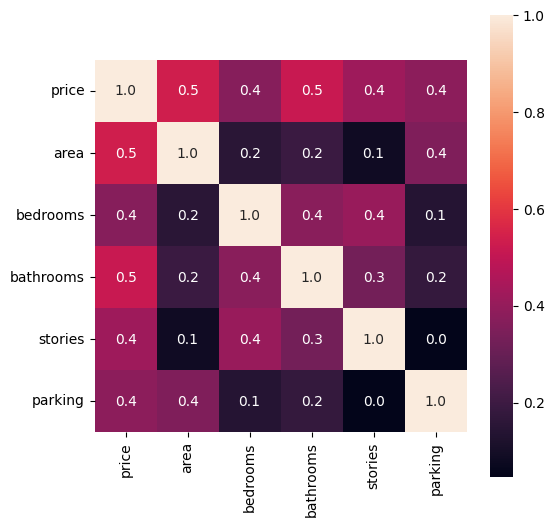

In [57]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation, cbar=True,square=True, fmt='.1f',annot=True, annot_kws=None)

In [58]:
print(housing_data.columns[1])

area


In [61]:
for i in housing_data.columns:
    housing_data[i] = housing_data[i].replace('yes', 1)
    housing_data[i] = housing_data[i].replace('no',0)


In [62]:
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [75]:
housing_data = housing_data.drop('furnishingstatus',axis=1)

In [76]:
A = housing_data['price']
B = housing_data.drop('price',axis=1)

In [77]:
A

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [78]:
B

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,7420,4,2,3,1,0,0,0,1,2,1
1,8960,4,4,4,1,0,0,0,1,3,0
2,9960,3,2,2,1,0,1,0,0,2,1
3,7500,4,2,2,1,0,1,0,1,3,1
4,7420,4,1,2,1,1,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0
541,2400,3,1,1,0,0,0,0,0,0,0
542,3620,2,1,1,1,0,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0,0


In [79]:
x_train, x_test, y_train, y_test = train_test_split(B,A, test_size=0.2, random_state=2)

In [80]:
print(B.shape,x_train.shape,x_test.shape)

(545, 11) (436, 11) (109, 11)


In [81]:
#Training Model

In [82]:
model = XGBRegressor()

In [83]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [84]:
predictor = model.predict(x_train)

In [85]:
score = metrics.r2_score(y_train,predictor)

In [86]:
score

0.9933529371669036

In [87]:
predictor

array([ 3439651.8,  4257171. ,  2689768.5,  4734093.5,  4129812.2,
        6918521.5,  2972115. ,  2669248.2,  6931970.5,  4679900.5,
        3357816. ,  3000749.5,  6011456.5,  5808950. ,  7625665. ,
        4103861.8,  5310097. ,  4589810. ,  7719328.5,  4258849.5,
        4188452.2,  3169377. ,  5272457.5,  4411809.5,  3908979.8,
        4031095. ,  6814825.5,  9168315. ,  4723633.5,  3311054. ,
        3807844.8,  3172449.8,  2405798.5,  3994667.2,  4169367.2,
        2781648.2,  4768963. ,  3632954.8,  1933565.9,  7980775.5,
        4204328.5, 12192735. ,  8597607. ,  7408868. ,  4077201.5,
        3199885.5,  4288587.5,  3394169.2,  3360194.5,  2473702. ,
        5868546.5,  3994030. ,  3764427.8,  3105760.2,  4107820.5,
        5470797. ,  3654894.2,  3765232. ,  3530047.2,  4063178.8,
        7434149.5,  4105850. ,  6000153. ,  3710547.8,  3741880.5,
        5496311. ,  6544293.5,  5818745.5,  5500065. ,  5595152. ,
        3240359.2,  3588547. ,  2875402.5,  4851956. ,  525152

In [92]:
x_train['price'] = predictor

In [93]:
x_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
412,2610,3,1,2,1,0,1,0,0,0,1,3439651.75
284,7770,2,1,1,1,0,0,0,0,1,0,4257171.00
504,3185,2,1,1,1,0,0,0,1,0,0,2689768.50
209,6720,3,1,1,1,0,0,0,0,0,0,4734093.50
269,3900,3,1,2,1,0,0,0,0,0,0,4129812.25
...,...,...,...,...,...,...,...,...,...,...,...,...
299,7000,3,1,1,1,0,0,0,0,3,0,4194178.50
534,3000,4,1,2,1,0,0,0,0,0,0,2244583.00
493,3960,3,1,1,1,0,0,0,0,0,0,3085455.25
527,1836,2,1,1,0,0,1,0,0,0,0,2280391.25
